<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Purpose of this project**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. This dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. In this project, we are trying to find the aspects that influence the rating and gross income made by cutomers.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In this sections, we basically do a quick glance of the dateset.

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Notice that the date has a type object, which is hard to manipulate. Therefore, we are going to change the format of Date into datetime object, and set Date as the index.

In [7]:
df["Date"] = pd.to_datetime(df["Date"])

In [8]:
df.set_index('Date', inplace = True)

In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.131488e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


### Task 2: Univariate Analysis

**Section 1** We are interested in the distribution of customer ratings.

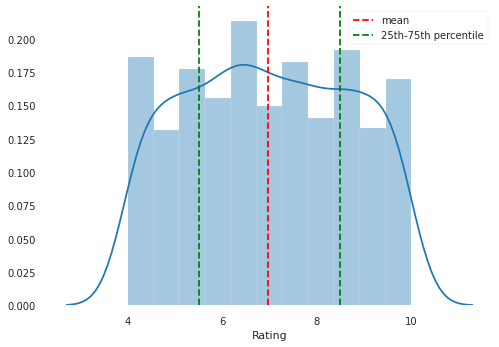

In [26]:
sns.distplot(df['Rating'])

plt.axvline(x=np.mean(df["Rating"]), c='red', ls='--',label='mean') # mean
plt.axvline(x=np.percentile(df["Rating"], 25), c='green', ls='--', label='25th-75th percentile') #25th percentile
plt.axvline(x=np.percentile(df["Rating"], 75), c='green', ls='--') #75th percentile
plt.legend()

From the performance of the plot, we can conclude that, the plot looks like a uniform distribution with out any skew in the left or right direction, which means none of the rating numbers particularly spikes out.

**Section 2** We want to see if aggregate sales number will be differed by much between branches.

array([[<AxesSubplot:title={'center':'Unit price'}>,
        <AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'gross margin percentage'}>],
       [<AxesSubplot:title={'center':'gross income'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

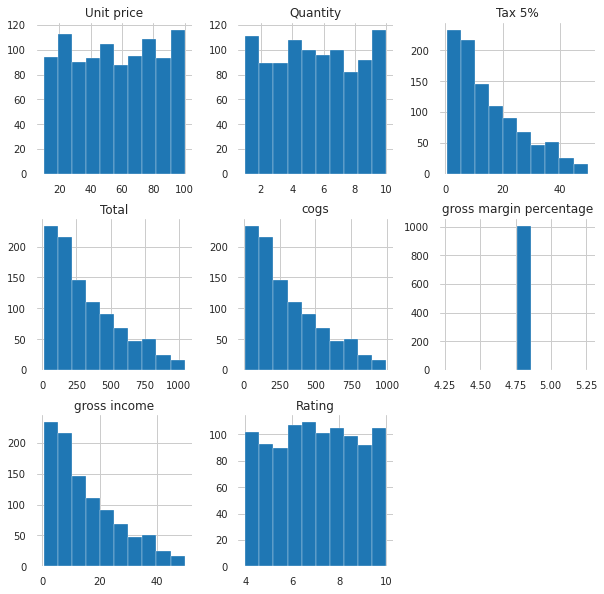

In [28]:
df.hist(figsize=(10, 10))

From the histgrams, we can see that tax, total, cogs, and gross income plots are right skewed, meaning that, for example, most of the tax collected falls between zero and 20, but there are a few cases where it's over 40, and therefore others would not surprised to see since they all follow identical distributions. 

Notice that the gross margin percentage is a constant value, which is why it doesn't have much of a distribution toe.

Unit price, quantity and rating are in uniform distribution.

### Task 3: Bivariate Analysis

**Section 3:** We want to see if there exists a relationship between gross income and customer ratings.

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

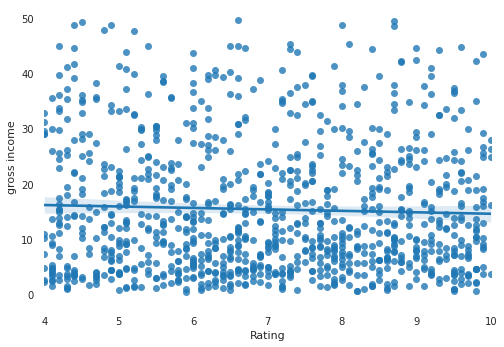

In [35]:
sns.regplot(df["Rating"], df["gross income"])

From the plot, it seems that the rating is not influenced by gross income at all, there is not a relationship between customer rating and gross income.

Apart from that, we want to find whether different branches affect different gross income.

<Axes: xlabel='Branch', ylabel='gross income'>

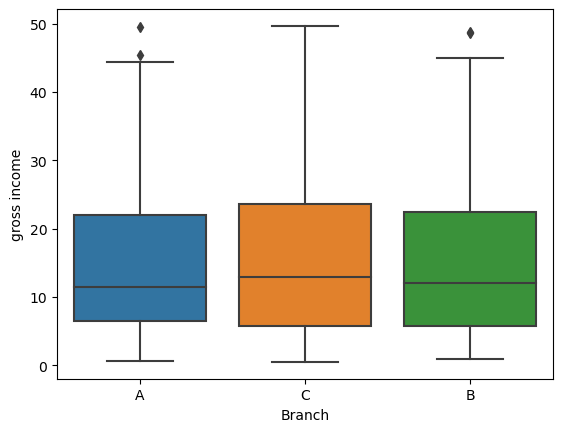

In [12]:
sns.boxplot(x=df["Branch"], y=df["gross income"])

The result turns out that no much varaition between gross income and branch in avg level.

That leads us to another point of view: If gender affects gross income?

<Axes: xlabel='Gender', ylabel='gross income'>

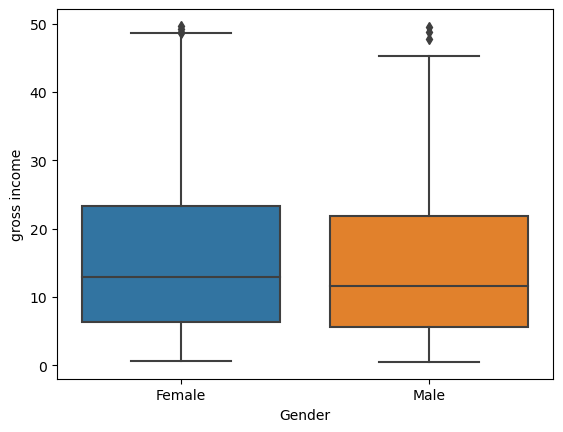

In [13]:
sns.boxplot(x=df["Gender"], y=df["gross income"])

The result seems to be no, since the means are about the same, but we can see a sligt difference at 75th, at which women has a hier gross income than men.

**Section 4:** We are intered in the relationship between time trend and gross income?

At this point, we noticed that there are some dates repeated, since there can be multiple customers at the same date, date value are duplicated, which we need to aggregate the data.

In [38]:
x_var = df.groupby(df.index).mean().index
y_var = df.groupby(df.index).mean()["gross income"]

<AxesSubplot:xlabel='Date', ylabel='gross income'>

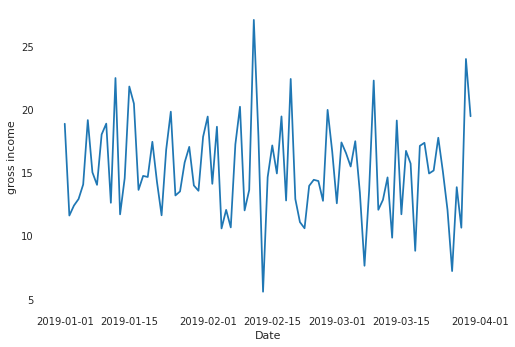

In [40]:
sns.lineplot(x_var, y_var)

We don't notice any time trend in this graph. It looks like it varies around the same mean. There are some days where there are high numbers in gross income. But that may because we only look into three month worth of data.

### Task 4: Dealing With Duplicate Rows and Missing Values

There will be unaviodable duplications and missing values occur in dataset, therefore those data should be handled.

In [45]:
df.duplicated().sum() # dealing with duplicated rows
df[df.duplicated()==True] # showing the duplicated ros

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [46]:
df.drop_duplicates(inplace=True)

In [49]:
#find missing values
df.isna().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<AxesSubplot:ylabel='Date'>

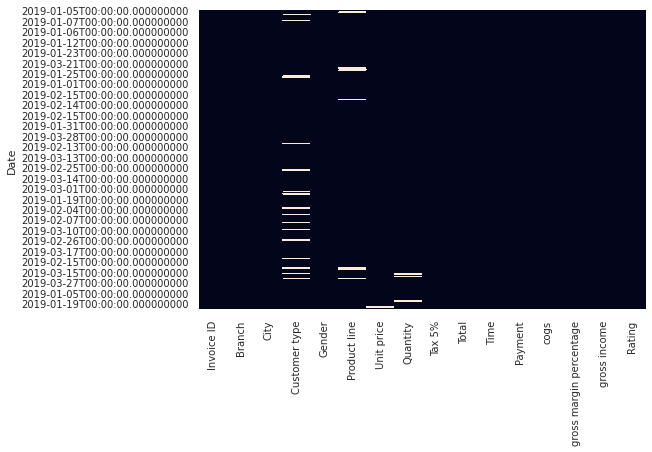

In [52]:
sns.heatmap(df.isnull(),cbar=False)

In [55]:
#fill the missing data with mode
df.fillna(df.mode().iloc[0], inplace=True)

At this time, the missing value are replaced by mode

### Task 5: Correlation Analysis

Finally, we are going to find the relationship between gross income and rating.

First, we find the correlation coeficient.

In [61]:
round(np.corrcoef(df['gross income'], df["Rating"])[1][0],2)
# Not significant correlation relationship

-0.04

The result turns out that there is no significant correlation relationship between gross income and rating.

To findout which two aspects will have influence on each other. we build a heat map based on the following correlation coefficient chart.

In [64]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.02,0.62,0.62,0.62,0.0,0.62,-0.00
Quantity,0.02,1.00,0.69,0.69,0.69,0.0,0.69,-0.03
Tax 5%,0.62,0.69,1.00,1.00,1.00,0.0,1.00,-0.04
Total,0.62,0.69,1.00,1.00,1.00,0.0,1.00,-0.04
cogs,0.62,0.69,1.00,1.00,1.00,0.0,1.00,-0.04
gross margin percentage,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00
gross income,0.62,0.69,1.00,1.00,1.00,0.0,1.00,-0.04
Rating,-0.00,-0.03,-0.04,-0.04,-0.04,0.0,-0.04,1.00


<AxesSubplot:>

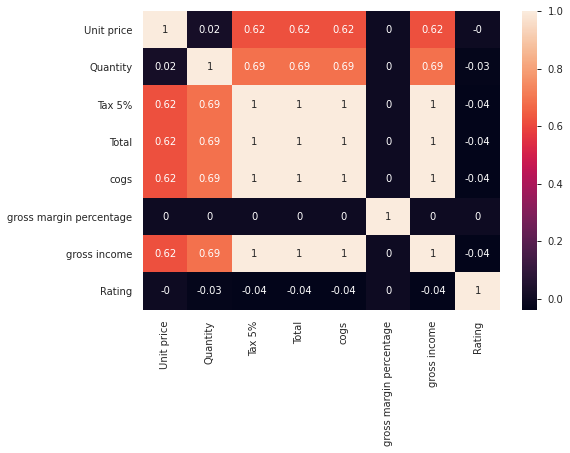

In [66]:
sns.heatmap(np.round(df.corr(),2), annot=True)

It turns out that, there is no aspect that will cause some effect on ratings, since all of the correlation values between ratings and other aspects are negative, however, we do notice that, unit price and quantity of merchandises has significant influence on gross insome, at a coefficient rate of 0.62 and 0.69. 

Therefore, we can conclude that, there's no relationship between ratings and gross income, the only two things that will affect gross income would be unit price and quantity of an merchandise.